# Import library

In [224]:
import numpy as np
import pandas as pd

In [225]:
df = pd.read_csv('student_placement_data.csv')

In [226]:
df.size

30000

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cgpa    10000 non-null  float64
 1   iq      10000 non-null  int64  
 2   placed  10000 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 234.5 KB


<style>
.step-box {
  background: #e6f4ea; /* Soft green background */
  border-left: 6px solid #2d6a4f; /* Dark green border */
  padding: 15px;
  margin: 10px 0;
  border-radius: 10px;
  font-family: 'Times New Roman', Times, serif;
  box-shadow: 2px 2px 8px rgba(0, 0, 0, 0.1);
}
.step-box h3 {
  color: #1b4332; /* Dark green text */
  margin-bottom: 10px;
}
.step-box ul {
  list-style-type: "👉 ";
  padding-left: 20px;
}
.step-box li {
  margin: 8px 0;
  font-size: 16px;
  color: #1b4332; /* Dark green text */
}
</style>

<div class="step-box">
  <h3>🚀 Model Building Steps</h3>
  <ul>
    <li>Preprocessing + EDA + Feature Selection</li>
    <li>Extract input and output columns</li>
    <li>Scale the values</li>
    <li>Train-test split</li>
    <li>Train the model</li>
    <li>Evaluate the model / Model selection</li>
    <li>Deploy the model</li>
  </ul>
</div>


In [228]:
df.shape

(10000, 3)

# **Perform PDA**

In [229]:
import matplotlib.pyplot as plt

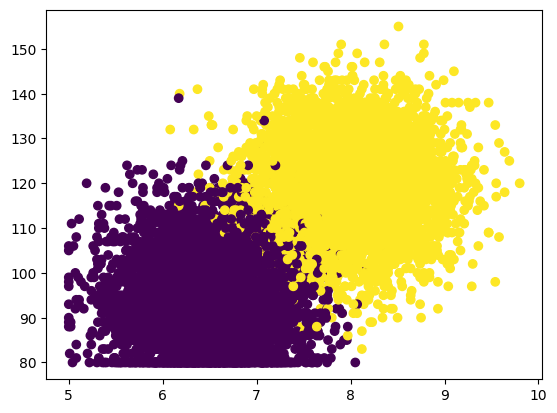

In [230]:
plt.scatter(df['cgpa'],df['iq'],c=df['placed'])

# Split Dependent and independent col

In [231]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [232]:
X

,cgpa,iq
0,6.20,80
1,7.79,129
2,6.77,99
3,6.36,82
4,6.76,86
...,...,...
9995,8.22,117
9996,6.26,86
9997,7.29,108
9998,7.82,103


In [233]:
y

,placed
0,0
1,1
2,0
3,0
4,0
...,...
9995,1
9996,0
9997,1
9998,1


# **Perform train test split**

In [234]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.19)

In [235]:
X_train.size

16200

In [236]:
y_test.size

1900

In [237]:
X_test.size

3800

In [238]:
y_train.size

8100

**Perform Scalling**

In [239]:
from sklearn.preprocessing import StandardScaler

In [240]:
scaler = StandardScaler()

In [241]:
X_train = scaler.fit_transform(X_train)

In [242]:
X_train

array([[ 0.37576995,  0.51320476],
       [ 0.36479129,  0.51320476],
       [ 0.20011128,  1.09350641],
       ...,
       [ 0.36479129, -0.58292056],
       [ 0.93568197,  0.7711166 ],
       [ 0.36479129,  0.7711166 ]])

In [243]:
X_text = scaler.transform(X_text)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [244]:
X_text

array([[-15.92916989,  -7.35432334],
       [-16.66294995,  -7.35659387],
       [-15.53009652,  -7.3588644 ],
       [-14.22988974,  -7.35687769],
       [-17.40960335,  -7.35971585],
       [-15.94204322,  -7.35233663],
       [-15.37561651,  -7.35772914],
       [-15.54296986,  -7.35091755],
       [-14.87355647,  -7.35034992],
       [-15.01516314,  -7.35716151],
       [-15.47860318,  -7.35375571],
       [-17.88591672,  -7.3622702 ],
       [-15.43998318,  -7.35205282],
       [-16.76593663,  -7.36510836],
       [-16.28962325,  -7.35063373],
       [-15.32412317,  -7.35403953],
       [-18.65831679,  -7.36198638],
       [-15.90342322,  -7.35545861],
       [-15.95491656,  -7.35120137],
       [-15.31124984,  -7.35432334],
       [-15.45285651,  -7.35148518],
       [-16.30249659,  -7.3622702 ],
       [-15.7103232 ,  -7.3500661 ],
       [-16.03215656,  -7.35489098],
       [-15.09240315,  -7.35290426],
       [-17.48684335,  -7.36510836],
       [-15.43998318,  -7.35687769],
 

# **Apply ML MODEL**

In [245]:
from sklearn.linear_model import LogisticRegression

In [246]:
clf = LogisticRegression(class_weight='balanced')

In [247]:
clf.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [248]:
y_pred = clf.predict(X_text)

In [249]:
y_test

,placed
9372,1
2592,0
5222,0
2894,0
1029,0
...,...
5922,0
6326,1
9620,1
2098,1


# **Check Model Accuracy**

In [250]:
from sklearn.metrics import accuracy_score

In [251]:
accuracy_score(y_test,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [1900, 190]

# **Check Dession Boundary**

In [252]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

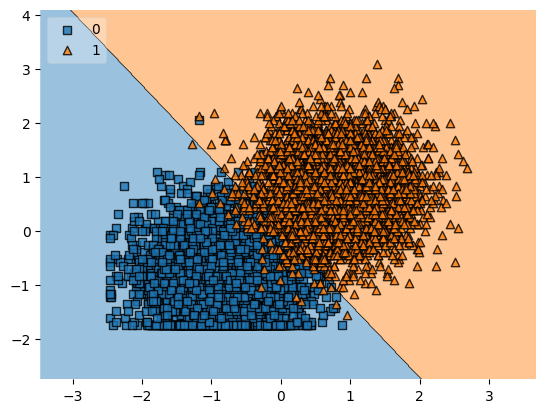

In [253]:
plot_decision_regions(X_train,y_train.values,clf=clf,legend=2)

# Predict Custom data

In [254]:
new_data = np.array([[0,2]])

In [255]:
predicition = clf.predict(new_data)

In [256]:
print("Placed" if predicition[0] == 1 else "Not Placed")

Placed


In [257]:
predicition

array([1])

In [258]:
df['placed'].value_counts()


,count
placed,
0,5013
1,4987


In [260]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [261]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       948
           1       0.50      1.00      0.67       952

    accuracy                           0.50      1900
   macro avg       0.25      0.50      0.33      1900
weighted avg       0.25      0.50      0.33      1900



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

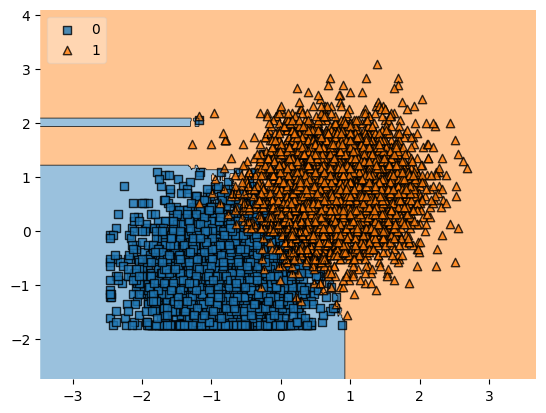

In [262]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)


In [263]:
new_data = np.array([[0,2]])

In [264]:
clf.predict(new_data)

array([1])

[Text(0.5, 0.875, 'cgpa <= 0.041\ngini = 0.5\nsamples = 8100\nvalue = [4065.0, 4035.0]\nclass = Not Placed'),
 Text(0.25, 0.625, 'iq <= 0.481\ngini = 0.137\nsamples = 4128\nvalue = [3822, 306]\nclass = Not Placed'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'iq <= -0.035\ngini = 0.044\nsamples = 3819\nvalue = [3733, 86]\nclass = Not Placed'),
 Text(0.0625, 0.125, 'gini = 0.009\nsamples = 3397\nvalue = [3381, 16]\nclass = Not Placed'),
 Text(0.1875, 0.125, 'gini = 0.277\nsamples = 422\nvalue = [352, 70]\nclass = Not Placed'),
 Text(0.375, 0.375, 'cgpa <= -0.365\ngini = 0.41\nsamples = 309\nvalue = [89, 220]\nclass = Placed'),
 Text(0.3125, 0.125, 'gini = 0.463\nsamples = 129\nvalue = [82, 47]\nclass = Not Placed'),
 Text(0.4375, 0.125, 'gini = 0.075\nsamples = 180\nvalue = [7, 173]\nclass = Placed'),
 Text(0.75, 0.625, 'iq <= -0.551\ngini = 0.115\nsamples = 3972\nvalue = [243, 3729]\nclass = Placed'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'cgpa <= 0.557\ngini = 0.41

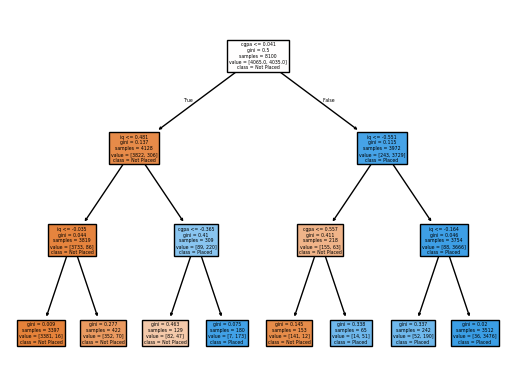

In [265]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
plot_tree(dt, feature_names=X.columns, class_names=['Not Placed','Placed'], filled=True)


In [266]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       948
           1       0.50      1.00      0.67       952

    accuracy                           0.50      1900
   macro avg       0.25      0.50      0.33      1900
weighted avg       0.25      0.50      0.33      1900



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
